# Title: Paddy Doctor Rice Disease Classification Competition

  
  <h1 style="font-family: 'sans-serif'; font-weight: bold; color: black;">👨‍💻Author: MUHAMMAD FURQAN</h1>

  [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadfurqan)

  [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadfurqan0)

  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadfurqan/)

  [![Gmail](https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail)](mailto:sheikhfurqan048@gmail.com)


### Problem Statement
Rice (Oryza sativa) is one of the staple foods worldwide. Paddy, the raw grain before removal of husk, is cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss. Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.

### Objective
The main objective of this competition is to develop a machine or deep learning-based model to classify the given paddy leaf images accurately. We provide a training dataset of 10,407 (75%) labeled images across ten classes (nine disease categories and normal leaf). Moreover, we also provide additional metadata for each image, such as the paddy variety and age. Your task is to classify each paddy image in the given test dataset of 3,469 (25%) images into one of the nine disease categories or a normal leaf.

## Import the Libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

2024-02-03 19:30:20.688567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 19:30:20.688681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 19:30:20.964375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# load the dataset
df = pd.read_csv('/kaggle/input/paddy-disease-classification/train.csv')

### Sneak Preview of Data

Achieve a rapid glimpse of your dataset with just one line of code! This convenient approach allows you to swiftly review the initial rows of your data, providing you with an instant grasp of the dataset's content without the need to scroll through the entire file.

In [3]:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [4]:
#Check the shape of data
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 10407 rows and 4 columns.


### Let's Check Number of Unique "labels" in our Training Data 

In [5]:
df['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

### Let's Check Number of Unique "Varieties" in our Training Data 

In [6]:
df['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

**`Observation:`** 
1. We have 10407 images in our training data
2. We have 10 unique disease
3. We also have 10 unique varieties of rice

### Summary of Data Characteristics

Descriptive statistics are employed to succinctly summarize and gain insight into the fundamental characteristics of the dataset.

In [7]:
df.describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


**`Observation:`** 
- We find only one numeric column **age** when we describe it:
    1. The range of age is from 45 to 82 

### Let's Check the values of "Age" and "Variety" by Grouping

In [8]:
df.groupby("age")["variety"].value_counts()

age  variety       
45   ADT45              286
     AndraPonni         112
     AtchayaPonni        55
     Surya               32
     Ponni               20
47   Ponni              112
50   ADT45              584
     KarnatakaPonni     218
     Onthanel           172
     AtchayaPonni        60
     IR20                32
55   ADT45              379
     Ponni              110
     Zonal               74
57   ADT45              126
     AtchayaPonni        87
60   ADT45             1394
     Ponni              266
62   ADT45                5
65   AndraPonni         265
     AtchayaPonni       259
     ADT45              250
66   ADT45               36
67   ADT45              401
     Ponni               14
68   ADT45              247
     Ponni                6
70   ADT45             2371
     Zonal              325
     Onthanel           179
     KarnatakaPonni      84
     IR20                82
     RR                  36
72   ADT45              552
73   ADT45               38


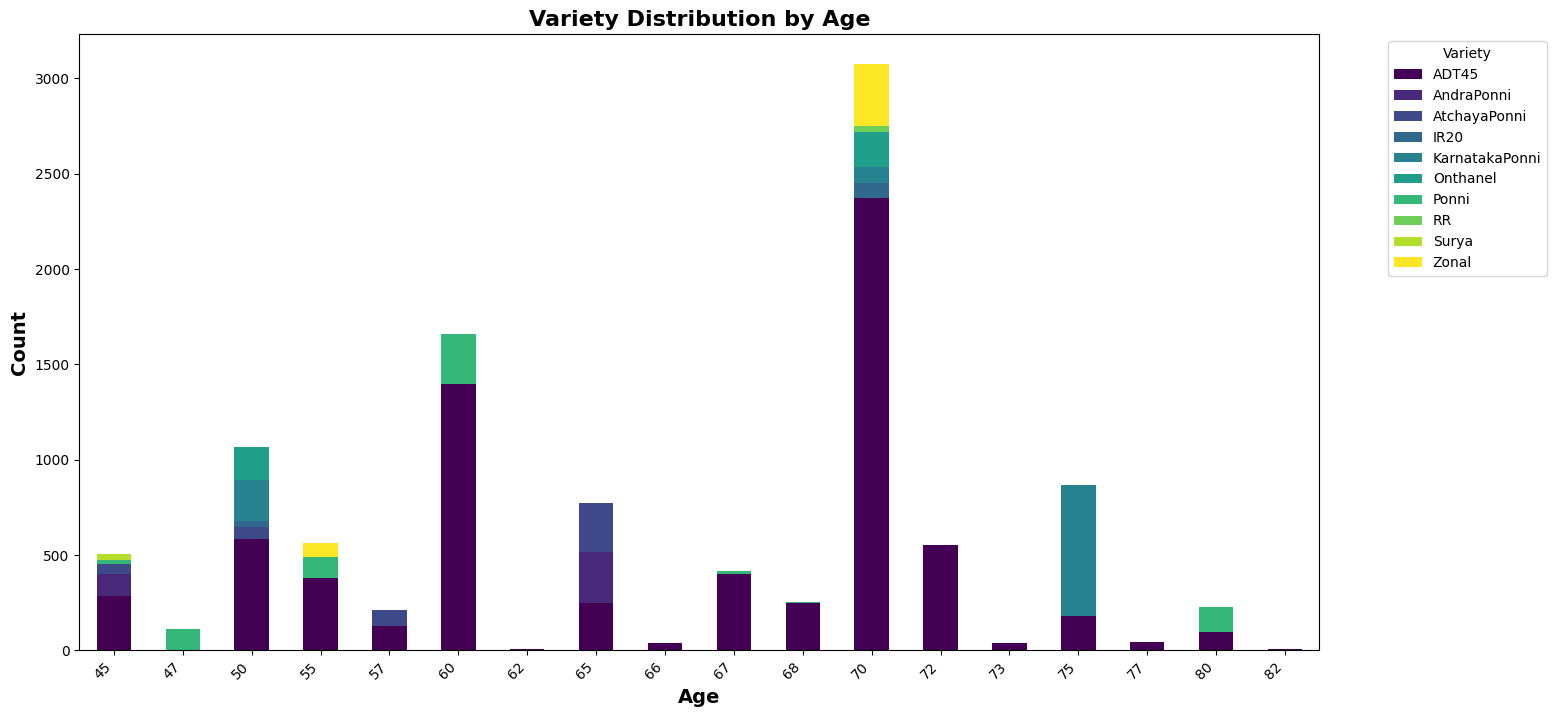

In [9]:
# Group by age and variety, then get the counts
grouped_counts = df.groupby("age")["variety"].value_counts().unstack().fillna(0)

# Plot the grouped counts using a bar plot
fig, axes = plt.subplots(figsize=(16, 8))
grouped_counts.plot(kind='bar', stacked=True, ax=axes, cmap='viridis')

# Customize the plot
plt.title("Variety Distribution by Age", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Let's Check the values of "Age" and "Label" by Grouping

In [10]:
df.groupby("age")["label"].value_counts()

age  label                   
45   blast                       179
     tungro                      104
     hispa                        83
     downy_mildew                 75
     brown_spot                   48
                                ... 
77   dead_heart                    4
80   dead_heart                  129
     bacterial_panicle_blight     66
     normal                       30
82   normal                        5
Name: count, Length: 95, dtype: int64

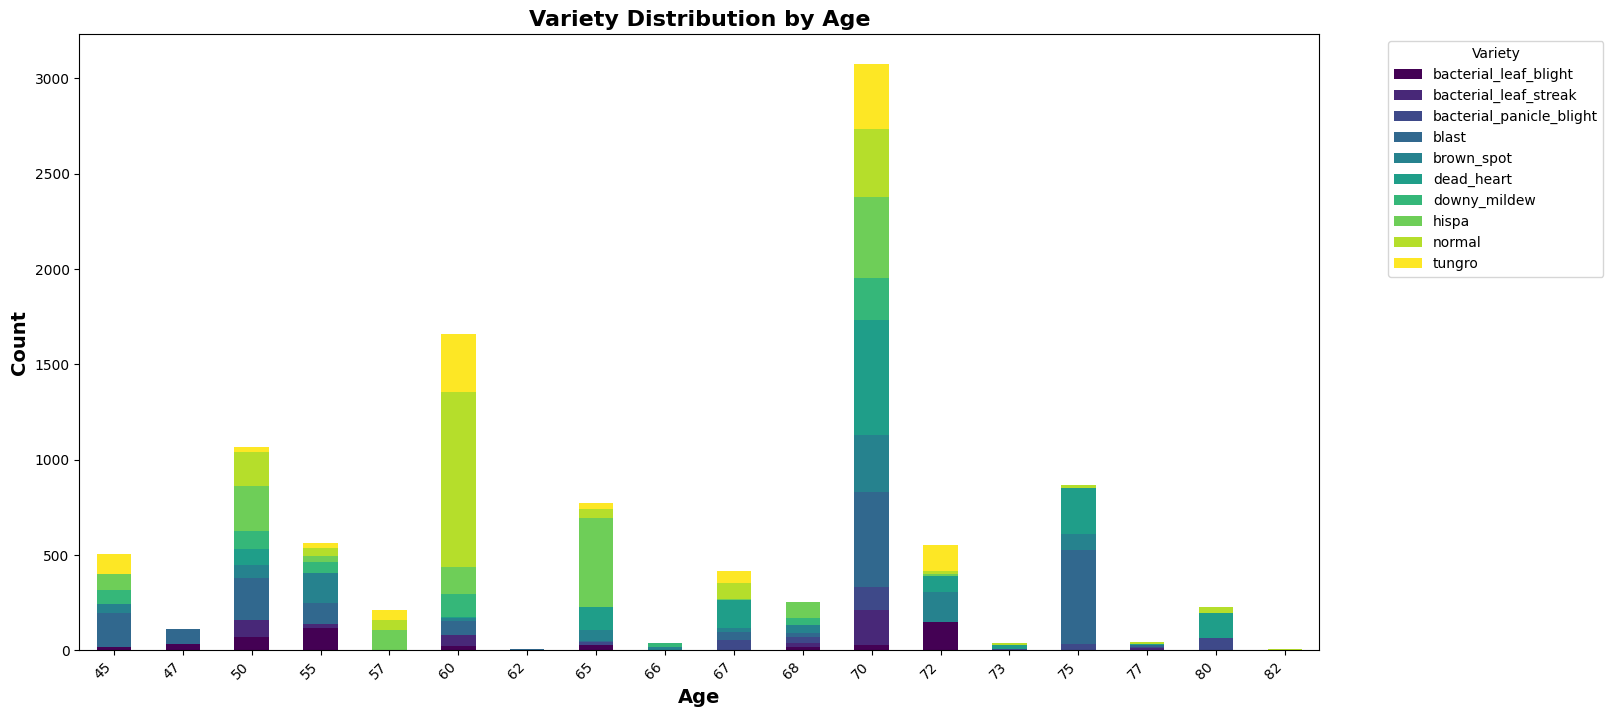

In [11]:
# Group by age and variety, then get the counts
grouped_counts = df.groupby("age")["label"].value_counts().unstack().fillna(0)

# Plot the grouped counts using a bar plot
fig, axes = plt.subplots(figsize=(16, 8))
grouped_counts.plot(kind='bar', stacked=True, ax=axes, cmap='viridis')

# Customize the plot
plt.title("Variety Distribution by Age", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


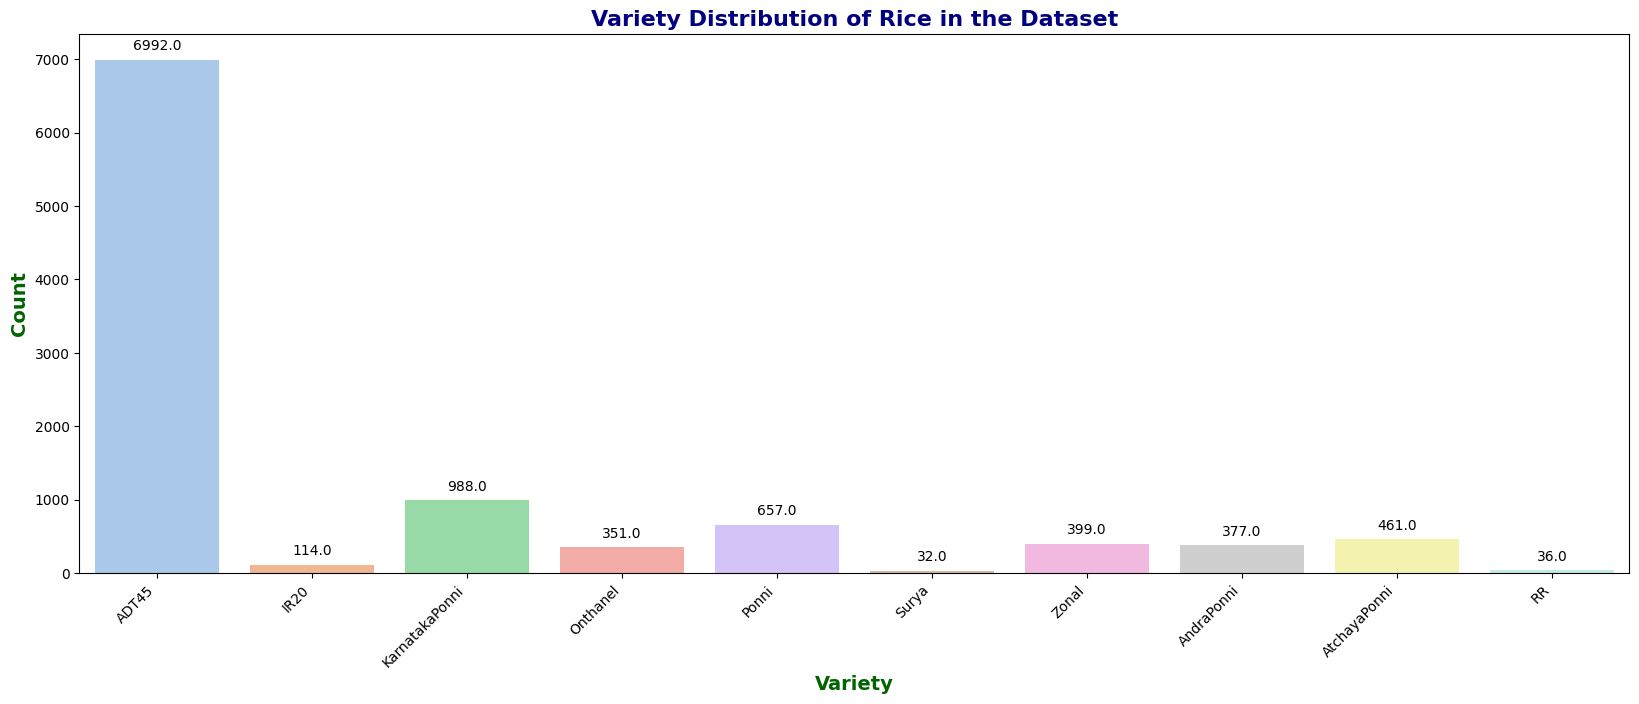

In [12]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Plot the data count based on the variety name using countplot
fig, axes = plt.subplots(1, 1, figsize=(20, 7))
sns.countplot(x='variety', data=df, palette=custom_palette, ax=axes)

# Customize the plot
plt.title("Variety Distribution of Rice in the Dataset", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Variety", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add annotations (counts) on top of each bar
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.show()


- ADT45 is the most common variety inside the training data

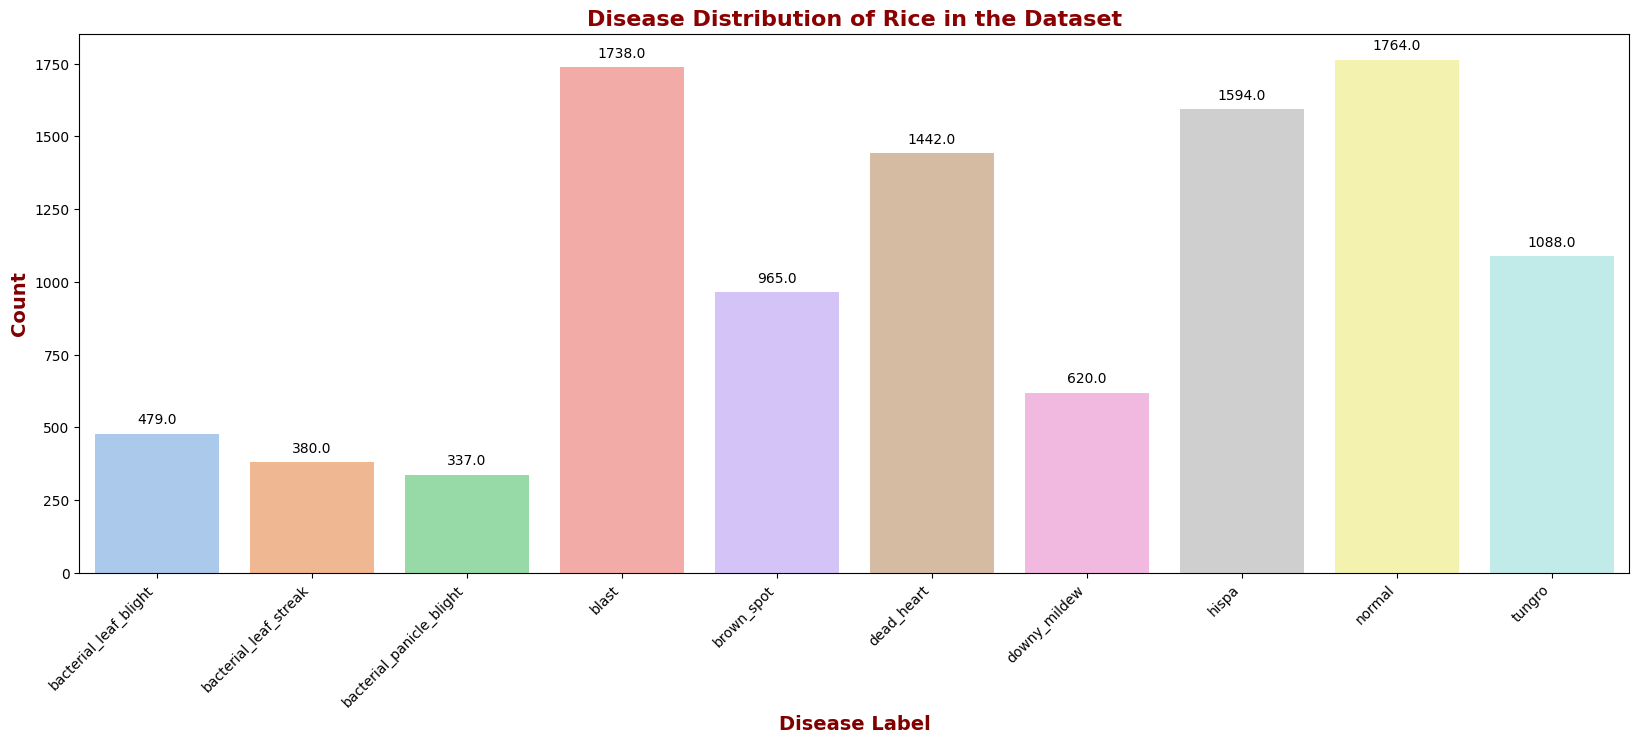

In [13]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Plot the data count based on the label using countplot
fig, axes = plt.subplots(1, 1, figsize=(20, 7))
sns.countplot(x='label', data=df, palette=custom_palette, ax=axes)

# Customize the plot
plt.title("Disease Distribution of Rice in the Dataset", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Disease Label", fontsize=14, fontweight='bold', color='maroon')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='maroon')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add annotations (counts) on top of each bar
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.show()


In [14]:
normal = df[df['label']=='normal']
normal = normal[normal['variety']=='ADT45']
normal_items = normal.image_id[:7].values
normal_items.tolist()

['100007.jpg',
 '100025.jpg',
 '100135.jpg',
 '100165.jpg',
 '100171.jpg',
 '100186.jpg',
 '100188.jpg']

In [15]:
dead = df[df['label']=='dead_heart']
dead = dead[dead['variety']=='ADT45']
dead_items = dead.image_id[:7].values
dead_items.tolist()

['101165.jpg',
 '102750.jpg',
 '108367.jpg',
 '109900.jpg',
 '100222.jpg',
 '100670.jpg',
 '100715.jpg']

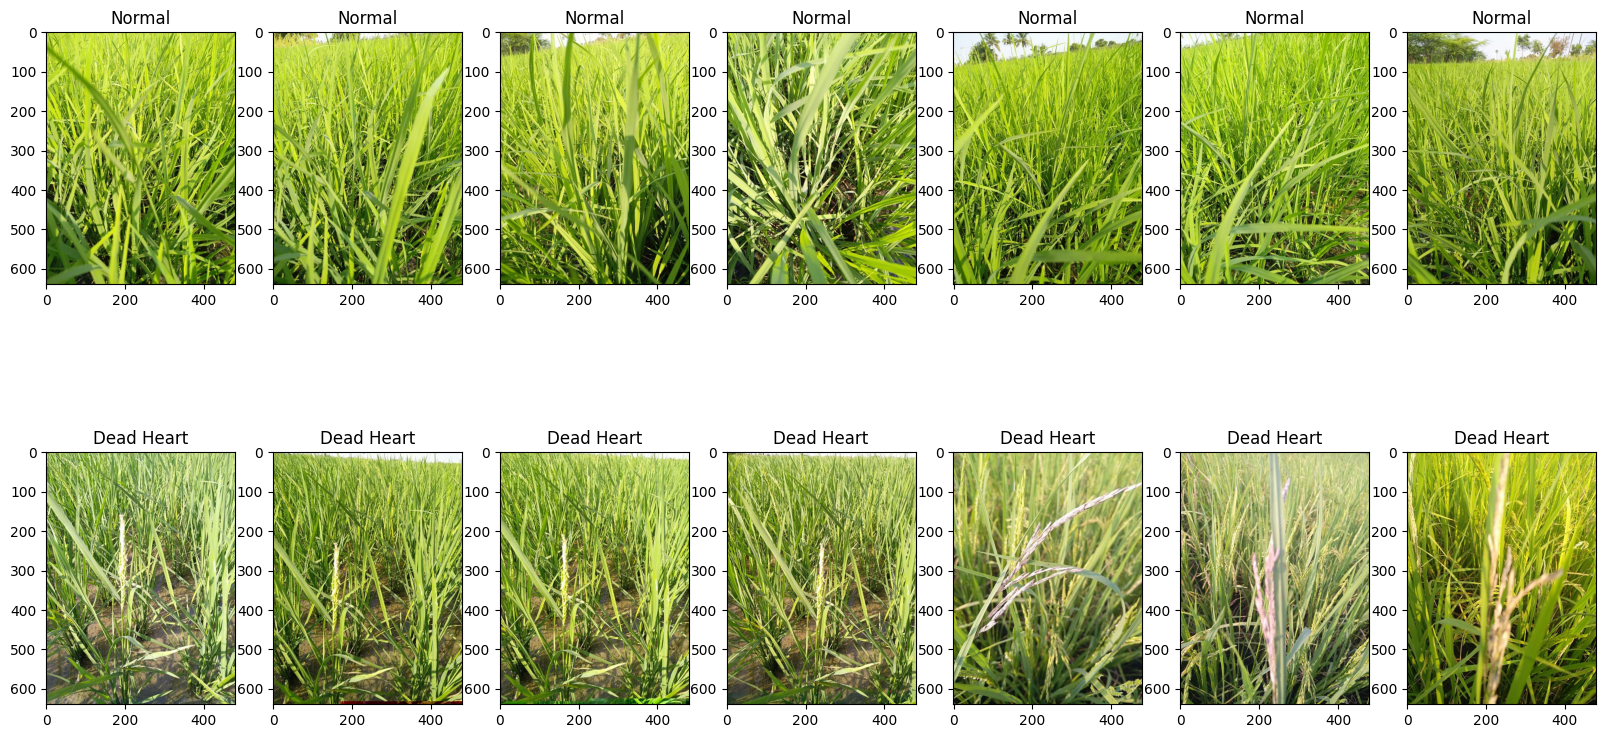

In [16]:
plt.figure(figsize=(20, 10))
columns = 7
path = '/kaggle/input/paddy-disease-classification/train_images/'

for i, image_loc in enumerate(np.concatenate((normal_items, dead_items))):
    plt.subplot(10//columns + 1, columns, i+1)
    if i < 7:
        image = plt.imread(path+"normal/"+image_loc)
        plt.title('Normal')
    else:
        image = plt.imread(path+"dead_heart/"+image_loc)
        plt.title('Dead Heart')
    plt.imshow(image)


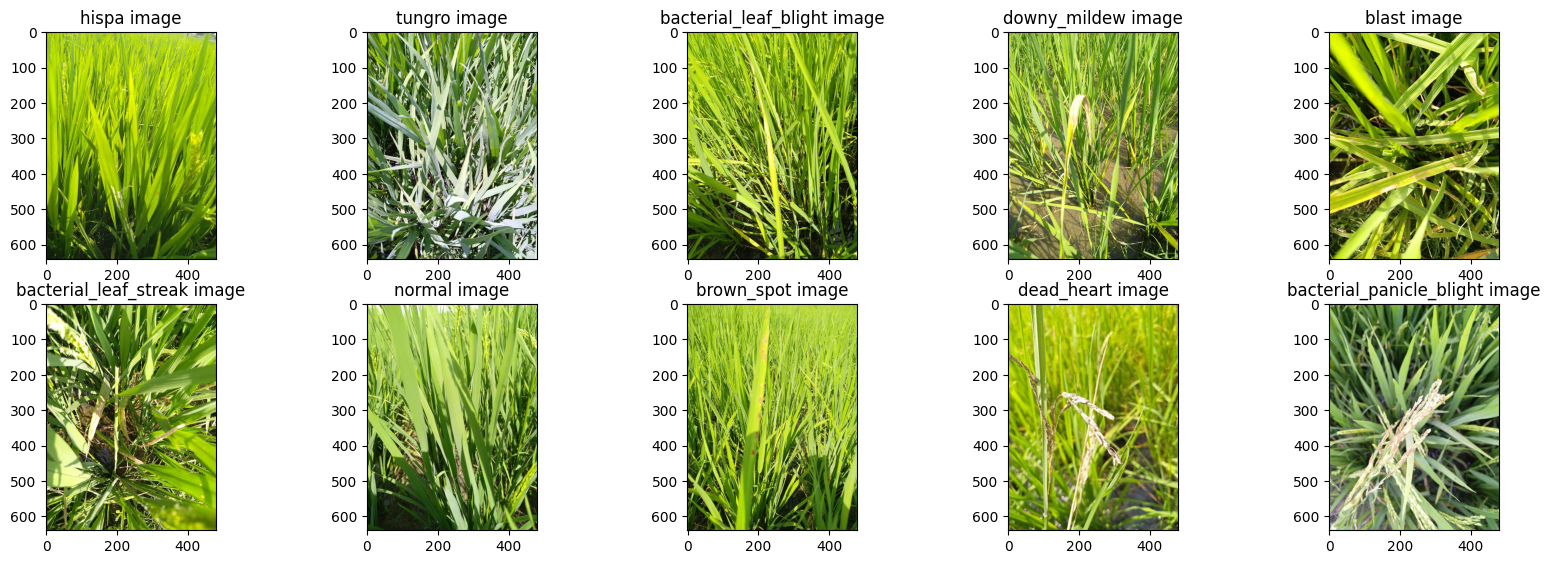

In [17]:
images = [
    '/kaggle/input/paddy-disease-classification/train_images/hispa/106590.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/tungro/109629.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_blight/109372.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/downy_mildew/102350.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/blast/110243.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_streak/101104.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/normal/109760.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/brown_spot/104675.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/dead_heart/105159.jpg',
    '/kaggle/input/paddy-disease-classification/train_images/bacterial_panicle_blight/101351.jpg'
]

diseases = ['hispa' , 'tungro', 'bacterial_leaf_blight', 'downy_mildew', 'blast',
            "bacterial_leaf_streak" , 'normal' , 'brown_spot' , 'dead_heart' , 'bacterial_panicle_blight' ]

diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns+1,columns,i+1)
    image = plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])
df['variety'] = encoder.fit_transform(df['variety'])


In [19]:
df.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [20]:
batch_size=32
image_width=224
image_height=224

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    validation_split = 0.3,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 10407 files belonging to 10 classes.
Using 7285 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_height),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [24]:
for image_batch , label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [25]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [26]:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))
image_batch , label_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`
print(np.min(first_image),np.max(first_image))

0.0 1.0


In [27]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Epoch 1/100


I0000 00:00:1706988665.162202      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


228/228 [==============================] - 34s 110ms/step - loss: 1.9249 - accuracy: 0.3224 - val_loss: 1.6389 - val_accuracy: 0.4435
Epoch 2/100
228/228 [==============================] - 15s 65ms/step - loss: 1.3959 - accuracy: 0.5198 - val_loss: 1.1937 - val_accuracy: 0.6290
Epoch 3/100
228/228 [==============================] - 16s 67ms/step - loss: 0.8987 - accuracy: 0.7072 - val_loss: 0.9953 - val_accuracy: 0.7232
Epoch 4/100
228/228 [==============================] - 15s 65ms/step - loss: 0.5132 - accuracy: 0.8350 - val_loss: 0.9019 - val_accuracy: 0.7727
Epoch 5/100
228/228 [==============================] - 16s 67ms/step - loss: 0.2664 - accuracy: 0.9108 - val_loss: 0.9803 - val_accuracy: 0.7943
Epoch 6/100
228/228 [==============================] - 15s 65ms/step - loss: 0.1495 - accuracy: 0.9546 - val_loss: 1.0909 - val_accuracy: 0.7866
Epoch 7/100
228/228 [==============================] - 15s 66ms/step - loss: 0.1258 - accuracy: 0.9596 - val_loss: 1.1720 - val_accuracy: 0.7

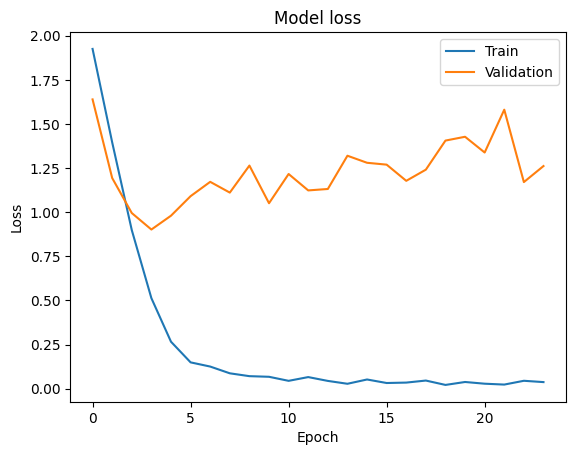

CPU times: user 17min, sys: 50.8 s, total: 17min 51s
Wall time: 6min 39s


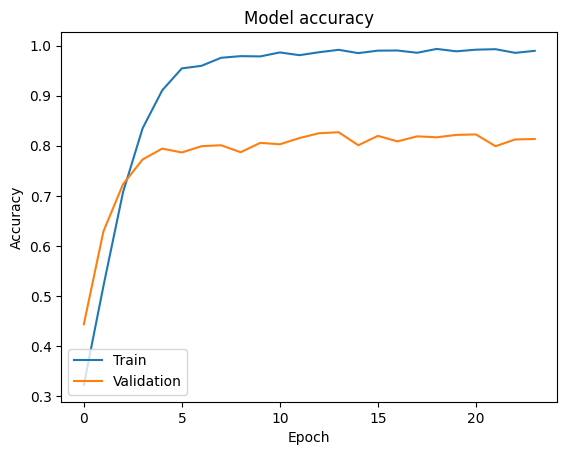

In [29]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=20)

history = model.fit(train_ds,
          validation_data = val_ds,
          epochs=100,
          callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [31]:
loss , accu = model.evaluate(val_ds)
print(f"the Testing loss is {loss:.2f}")
print(f"The testing accuracy is {accu*100:.2f}%")

66/66 [==============================] - 3s 41ms/step - loss: 1.2614 - accuracy: 0.8136
the Testing loss is 1.26
The testing accuracy is 81.36%


In [32]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/paddy-disease-classification/test_images/',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    label_mode=None,
    shuffle=False)

Found 3469 files belonging to 1 classes.


In [33]:
y_pred =  model.predict(test_ds, batch_size = batch_size, verbose = 1)
y_pred.shape

109/109 [==============================] - 9s 79ms/step


(3469, 10)

In [34]:
y_pred_classes = y_pred.argmax(axis = 1)
y_pred_classes.shape

(3469,)

In [35]:
y_classes_names = [class_names[x] for x in y_pred_classes]

In [36]:
predictions = pd.read_csv('/kaggle/input/paddy-disease-classification/sample_submission.csv')
predictions['label'] = y_classes_names
predictions.to_csv('submission.csv', index = False)